## **Credit Risk Prediction**

### **Objective**
1. Predict credit Defaulters.
2. Solution: Types Customer to Avoid.

### **Table of Contents**
[1. Take a Quick Look at the Data Structure](#quick-look) <br>
[2. Exploratory Data Analysis](#eda) <br>
[3. Prepare the Data for Machine Learning Model](#prepare-data-ml) <br>
[4. Build Baseline Model](#base-model) <br>
[5. Final Model](#final-model) <br>
[6. Tuning Model](#tuning-model) <br>
[7. Evaluation Model](#evaluation-model) <br>
[8. Summary](#summary) <br>

### **Setting Library**

In [4]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit learn important 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# for making pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# for machine learning model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# for handling imbalance dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# for validation
from sklearn.metrics import (recall_score,
                            precision_score,
                            f1_score,
                            classification_report,
                            roc_auc_score,
                            ConfusionMatrixDisplay,
                            confusion_matrix, 
                            make_scorer)
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC


# for handling word
import re
from collections import Counter

# color pallete for visualization
colorpallete = ["#E1D7C6", "#0E5E6F", "#5B57BB"]

# setting display numbers, rows, and columns
pd.set_option("display.float", "{:.2f}".format) # showing float in two number 
pd.set_option("display.max_columns", 100) # showing max 100 columns
pd.set_option("display.max_rows", 100) # showing max 100 rows

### **Import Dataset**

In [5]:
# import data from csv 
df = pd.read_csv("loan_data_2007_2014.csv", delimiter=",")

C:\Users\madii\AppData\Local\Temp\ipykernel_8996\2087040236.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv", delimiter=",")


<a id='quick-look'></a>
### **1. Take a Quick Look at the Data Structure** 

In [6]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.00,Jan-85,1.00,NaN,NaN,3.00,0.00,13648,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.00,Apr-99,5.00,NaN,NaN,3.00,0.00,1687,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.00,Nov-01,2.00,NaN,NaN,2.00,0.00,2956,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.00,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.00,Feb-96,1.00,35.00,NaN,10.00,0.00,5598,21.00,37.00,f,0.00,0.00,12226.30,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.00,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.00,Jan-96,0.00,38.00,NaN,15.00,0.00,27783,53.90,38.00,f,766.90,766.90,3242.17,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
# statistic data
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466281.00,466285.00,466256.00,466256.00,215934.00,62638.00,466256.00,466256.00,466285.00,465945.00,466256.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466140.00,98974.00,466285.00,0.00,0.00,0.00,466256.00,396009.00,396009.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,396009.00,0.00,0.00,0.00
mean,233142.00,13079729.91,14597660.62,14317.28,14291.80,14222.33,13.83,432.06,73277.38,17.22,0.28,0.80,34.10,74.31,11.19,0.16,16230.20,56.18,25.06,4410.06,4408.45,11540.69,11469.89,8866.01,2588.68,0.65,85.34,8.96,3123.91,0.01,42.85,1.00,NaN,NaN,NaN,0.00,191.91,138801.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.09,NaN,NaN,NaN
std,134605.03,10893711.62,11682367.44,8286.51,8274.37,8297.64,4.36,243.49,54963.57,7.85,0.80,1.09,21.78,30.36,4.99,0.51,20676.25,23.73,11.60,6355.08,6353.20,8265.63,8254.16,7031.69,2483.81,5.27,552.22,85.49,5554.74,0.11,21.66,0.00,NaN,NaN,NaN,0.07,14630.21,152114.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37247.13,NaN,NaN,NaN
min,0.00,54734.00,70473.00,500.00,500.00,0.00,5.42,15.67,1896.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
25%,116571.00,3639987.00,4379705.00,8000.00,8000.00,8000.00,10.99,256.69,45000.00,11.36,0.00,0.00,16.00,53.00,8.00,0.00,6413.00,39.20,17.00,0.00,0.00,5552.13,5499.25,3708.56,957.28,0.00,0.00,0.00,312.62,0.00,26.00,1.00,NaN,NaN,NaN,0.00,0.00,28618.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13500.00,NaN,NaN,NaN
50%,233142.00,10107897.00,11941075.00,12000.00,12000.00,12000.00,13.66,379.89,63000.00,16.87,0.00,0.00,31.00,76.00,10.00,0.00,11764.00,57.60,23.00,441.47,441.38,9419.25,9355.43,6817.76,1818.88,0.00,0.00,0.00,545.96,0.00,42.00,1.00,NaN,NaN,NaN,0.00,0.00,81539.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22800.00,NaN,NaN,NaN
75%,349713.00,20731209.00,23001541.00,20000.00,20000.00,19950.00,16.49,566.58,88960.00,22.78,0.00,1.00,49.00,102.00,14.00,0.00,20333.00,74.70,32.00,7341.65,7338.39,15308.16,15231.31,12000.00,3304.53,0.00,0.00,0.00,3187.51,0.00,59.00,1.00,NaN,NaN,NaN,0.00,0.00,208953.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37900.00,NaN,NaN,NaN
max,466284.00,38098114.00,40860827.00,35000.00,35000.00,35000.00,26.06,1409.99,7500000.00,39.99,29.00,33.00,188.00,129.00,84.00,63.00,2568995.00,892.30,156.00,32160.38,32160.38,57777.58,57777.58,35000.03,24205.62,358.68,33520.27,7002.19,36234.44,20.00,188.00,1.00,NaN,NaN,NaN,5.00,9152545.00,8000078.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999999.00,NaN,NaN,NaN


#### **1.1. Take a Look at the Target Data : `loan_status`**

In [9]:
# create dataframe for loan status
loanstatus = df.loan_status.value_counts() \
    .reset_index(name="how much data")\
    .rename(columns={"index":"loan status"})

loanstatus

,loan status,how much data
0,Current,224226
1,Fully Paid,184739
2,Charged Off,42475
3,Late (31-120 days),6900
4,In Grace Period,3146
5,Does not meet the credit policy. Status:Fully ...,1988
6,Late (16-30 days),1218
7,Default,832
8,Does not meet the credit policy. Status:Charge...,761


**Meaning every category** <br>
1. `Current`: The loan is in good standing and payments are up to date.
2. `Fully Paid`: The loan has been fully paid off.
3. `Charged Off`: The lender has given up on collecting the loan because the borrower has defaulted on payments.
4. `Late (31-120 days)`: The borrower has missed payments, and the loan is considered to be delinquent by 31 to 120 days.
5. `In Grace Period`: The borrower has missed payments, but the loan is still in a grace period where the borrower can make a payment without being considered delinquent.
6. `Does not meet the credit policy. Status:Fully Paid`: The loan was approved even though it did not meet the lender's credit policy, but the borrower has fully paid off the loan.
7. `Late (16-30 days)`: The borrower has missed payments, and the loan is considered to be delinquent by 16 to 30 days.
8. `Default`: The borrower has failed to make payments and has defaulted on the loan.
9. `Does not meet the credit policy. Status:Charged Off`: The loan was approved even though it did not meet the lender's credit policy, but the borrower has defaulted on the loan.

**note:** <br>
there are lot category for loan status. i'll recategorize the loan status. <br><br>
so, it will looks like this:
1. **Not Default** : [`Fully Paid`, `Current`, `In Grace Period`, `Does not meet the credit policy. Status:Fully Paid`]
2. **Default** : [`Charged Off`, `Late (31-120 days)`, `Late (16-30 days)`, `Default`, `Does not meet the credit policy. Status:Charged Off`]

In [10]:
# recategorize the data
ls_categorize = {
    "Current":"not default", 
    "Fully Paid":"not default", 
    "Charged Off":"default", 
    "Late (31-120 days)":"default",
    "In Grace Period":"not default", 
    "Does not meet the credit policy. Status:Fully Paid":"not default",
    "Late (16-30 days)":"default", 
    "Default":"default",
    "Does not meet the credit policy. Status:Charged Off":"default"
}

# map the dict to the column 
loanstatus["loan status"] = loanstatus["loan status"].map(ls_categorize)

# update the dataframe loanstatus
loanstatus = loanstatus.groupby("loan status")["how much data"].sum().reset_index()
loanstatus

,loan status,how much data
0,default,52186
1,not default,414099


**note** <br>
from above output, we facing imbalanced dataset.

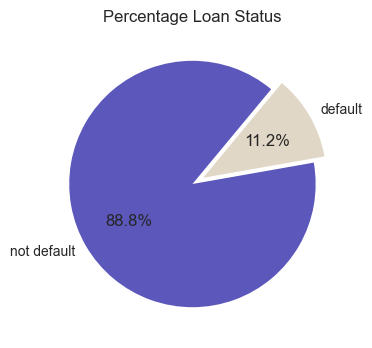

In [11]:
# create pie chart for loan status
plt.figure(figsize=(4,4))
plt.pie(loanstatus["how much data"], 
        labels=loanstatus["loan status"], 
        colors=["#E1D7C6", "#5B57BB"],
        explode=(0.1, 0), 
        autopct="%1.1f%%", startangle=10)

# add some styling
plt.title("Percentage Loan Status")

# show the plot
plt.show()

<a id='eda'></a>
### **2. Exploratory Data Analysis**

#### **2.1. Looking Missing Value**

In [12]:
# calculate the percentage of missing values for each column
missing_pct = round(df.isna().mean() * 100, 2)

# create a new dataframe with the percentage missing values
missing_df = pd.DataFrame({"column name": missing_pct.index, 
                           "missing pct %": missing_pct.values})\

# sort the dataframe by percentage of missing values
missing_df = missing_df.sort_values(by="missing pct %", ascending=False)

# reset the index
missing_df = missing_df.reset_index(drop=True)

# length of missing values
lenmissval = 0
for i in df.isna().sum().values:
    if i != 0:
        lenmissval += 1
print("Total columns with missing values\t:", lenmissval)

missing_df

Total columns with missing values	: 40


,column name,missing pct %
0,inq_last_12m,100.00
1,total_bal_il,100.00
2,annual_inc_joint,100.00
3,dti_joint,100.00
4,verification_status_joint,100.00
5,open_acc_6m,100.00
6,open_il_12m,100.00
7,open_il_24m,100.00
8,mths_since_rcnt_il,100.00
9,open_il_6m,100.00


**note 2.1.**<br>
there are 40 columns with missing value : 
- **17 columns** are 100% missing. (this will be drop and not further analysis)
- **4 columns** above 50% missing.
- **19 columns** are around 5% missing.

#### **2.2. Looking columns with just one value, also check the duplicate.**

In [13]:
# check columns with just one value
single_val = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with single value\t:", single_val)

# check the duplicate value
print(
    "Length of Duplicate Values\t:", df.duplicated().sum()
)

Columns with single value	: ['policy_code', 'application_type']
Length of Duplicate Values	: 0


#### **2.3. Multivariate Analysis**

**for further analysis, i'll be focusing in this features** <br><br>
- `loan_amnt`: loan amount requested by the borrower <br>
- `term`: length of the loan <br>
- `int_rate`: interest rate on the loan <br>
- `grade` and `sub_grade`: risk classification of the loan <br>
- `emp_title`: borrower job <br>
- `emp_length`: employment length of the borrower <br>
- `home_ownership`: type of home ownership <br>
- `annual_inc`: annual income of the borrower <br>
- `verification_status`: whether the borrower's income was verified by the lender <br>
- `purpose`: purpose of the loan <br>
- `dti`: debt-to-income ratio of the borrower <br>
- `delinq_2yrs`: Total number of late payments over the last 2 years. <br>
- `pub_rec`: The total number of public records of defaults on borrowers' debt repayments. <br>
- `total_acc`: Total number of credit accounts reported by credit institutions. <br>
- `inq_last_6mths`: Number of credit enquiries in the last 6 months.<br>
- `revol_util` : Percentage of total utilization of the borrower's entire credit card and unsecured credit limit. <br>

In [14]:
# copy dataset
df_eda = df.copy()

In [15]:
# categorize loan status
ls_categorize = {
    "Current":"not default", 
    "Fully Paid":"not default", 
    "Charged Off":"default", 
    "Late (31-120 days)":"default",
    "In Grace Period":"not default", 
    "Does not meet the credit policy. Status:Fully Paid":"not default",
    "Late (16-30 days)":"default", 
    "Default":"default",
    "Does not meet the credit policy. Status:Charged Off":"default"
}

# mapping the value
df_eda["loan_status"] = df_eda["loan_status"].map(ls_categorize)

##### **a. Categorical Features** : `Home_ownership`, `grade`, `sub_grade`, `emp_length`, `emp_title`, `term`, `verification_status`, `purpose`. 

**- Define Function** 

In [16]:
# Function to get percentage default and not default.
def default_percentage(data, column):
    # group the DataFrame by the specified column and the "default" column
    grouped = data.groupby([column, "loan_status"])["loan_status"].count().unstack()

    # calculate the percentage of "default" and "not default" values for each group
    grouped["default_pct"] = (grouped["default"] / grouped.sum(axis=1))*100
    grouped["not_default_pct"] = (grouped["not default"] / grouped.sum(axis=1))*100

    # create a new DataFrame with the percentage values
    result = grouped[["default_pct", "not_default_pct"]] 


    return result

In [17]:
# function for categorical graph
def categorical_graph(source):

    # create canvas
    if source.index.name == "sub_grade":
        plt.figure(figsize=(15,5))
    else:
        plt.figure(figsize=(6,3))
    
    # create bar graph
    ax = source["default_pct"].plot(kind="bar", color="#5B57BB", alpha=1)
    ax.bar_label(
        # selecting bar
        container = ax.containers[0],
        # convert numpy array to list
        labels = [round(x, 2) for x in source["default_pct"].values],
        # set rotation value
        rotation=90 if source.index.name == "sub_grade" else 0)

    # create title
    plt.title(source.index.name.capitalize(), fontsize=13)

    # create x and y label 
    plt.ylabel("Percent Defaulter Borrowers (%)")
    plt.xlabel(None)

    # create grid
    plt.grid(True, alpha = 0.4, linewidth = 0.5)

    # rotate the x values
    if source.index.name == "sub_grade" or source.index.name == "emp_length"\
          or source.index.name == "purpose" or source.index.name == "category":    
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=0)

    # to save image
    # plt.savefig(f"{source.index.name}.png", dpi=300, bbox_inches='tight')

    plt.show()

**a. term feature**

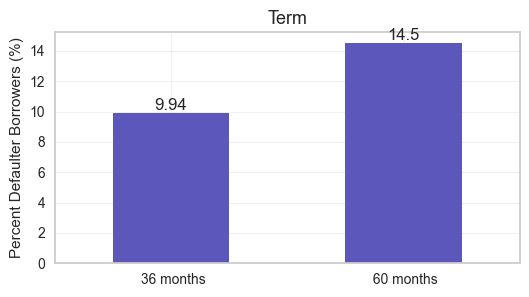

In [18]:
term = default_percentage(df_eda, "term")
categorical_graph(term)

**b. Grade and Sub Grade Features**

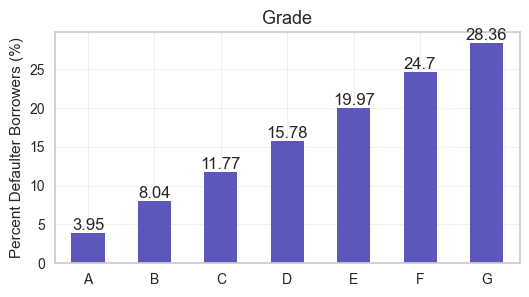

In [19]:
grade = default_percentage(df_eda, "grade")
categorical_graph(grade)

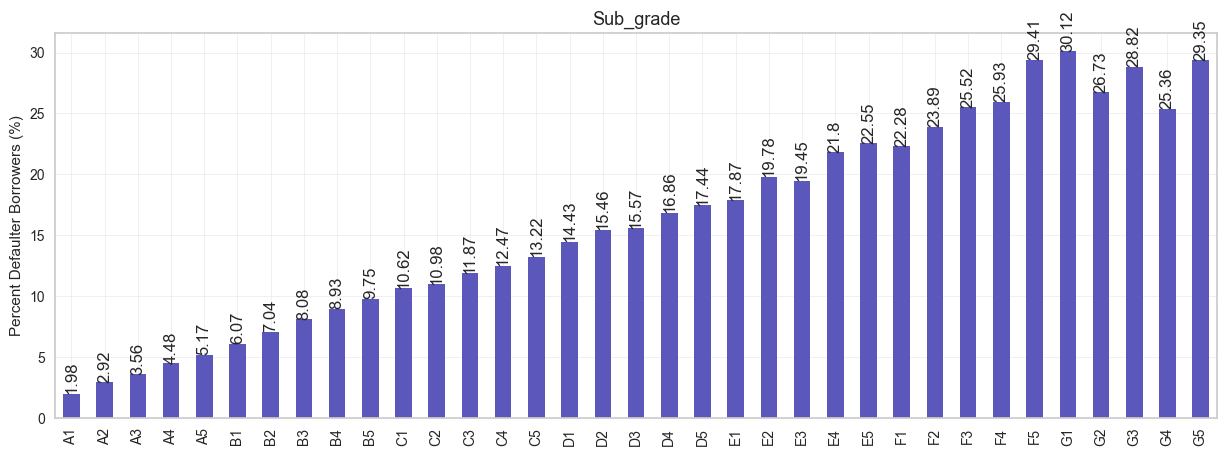

In [20]:
subgrade = default_percentage(df_eda, "sub_grade")
categorical_graph(subgrade)

**c. Employement length (How Long Employe have works) features**

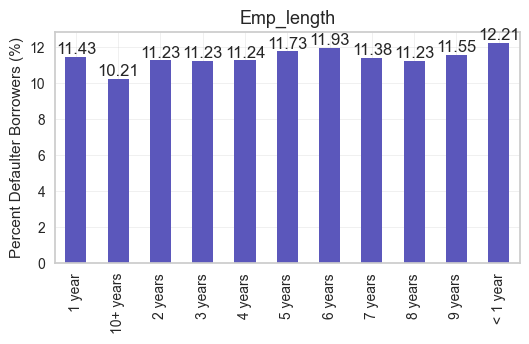

In [21]:
emplength = default_percentage(df_eda, "emp_length")
categorical_graph(emplength)

**d. Emp title feature**

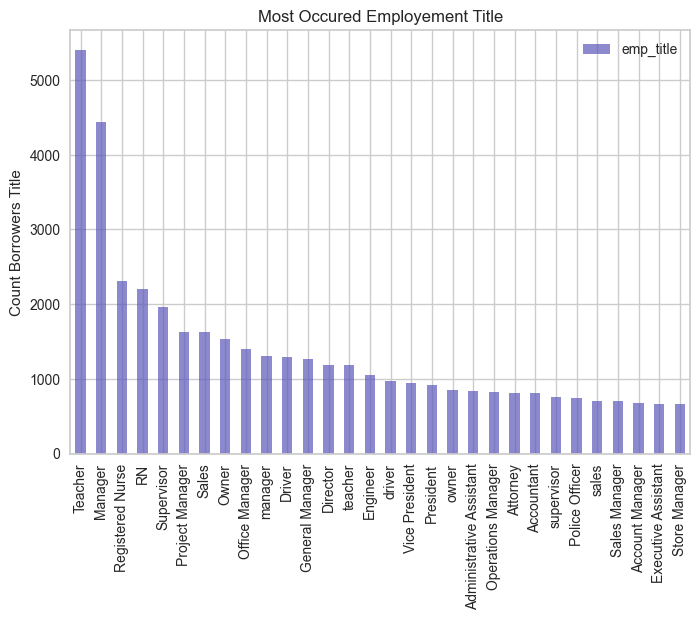

In [22]:
# create graph 
emp_title = df_eda.emp_title.value_counts().reset_index().sort_values(by="emp_title", ascending=False).head(30)
emp_title.plot.bar(x="index", color="#5B57BB", alpha=0.7)
# title graph
plt.title("Most Occured Employement Title")
# x and y label
plt.xlabel("")
plt.ylabel("Count Borrowers Title")

# showing plot
plt.show()

**e. Home Ownership Feature**

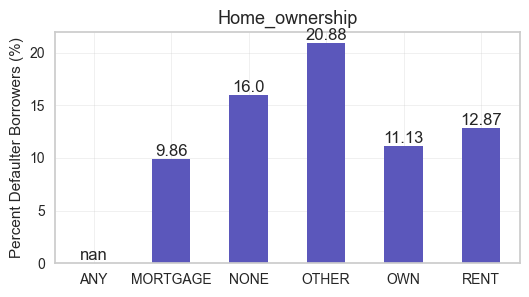

In [23]:
home = default_percentage(df_eda, "home_ownership")
categorical_graph(home)

**f. Verification Status Feature**

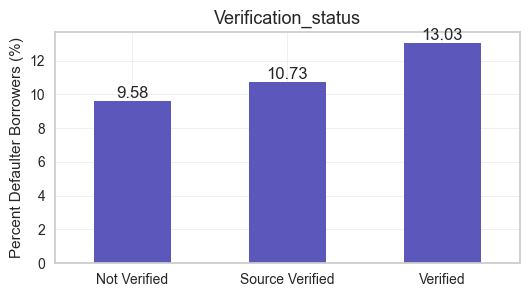

In [24]:
verstat = default_percentage(df_eda, "verification_status")
categorical_graph(verstat)

**h. purpose**

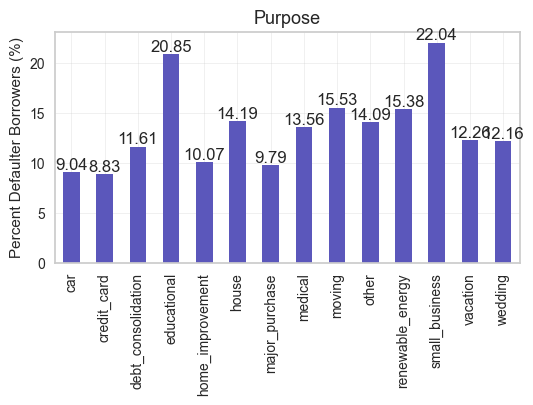

In [25]:
purpose = default_percentage(df_eda, "purpose")
categorical_graph(purpose)

**i. initial list status features**

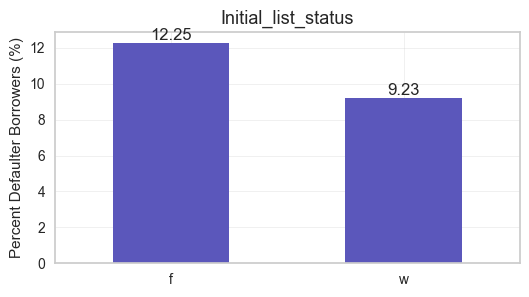

In [26]:
initial = default_percentage(df_eda, "initial_list_status")
categorical_graph(initial)

**j. Levels Job**

In [27]:
# preprocess the df_eda
df_eda["processed"] = df_eda["emp_title"].astype(str)
# preprocess the df_eda
df_eda["processed"] = [re.sub(r"[^\w\s]", "", category) for category in df_eda["processed"]] # remove punctuation
df_eda["processed"] = [category.lower() for category in df_eda["processed"]] # convert to lowercase

# Identify the most frequent words
tokens = [token for category in df_eda["processed"] for token in category.split()]
word_counts = Counter(tokens)
most_common_words = [word for word, count in word_counts.most_common(20)]

# job levels
levels = {
    "Mid-Level": ["mid", "intermediate", "supervisor"],
    "Senior": ["senior", "sr", "lead", "head"],
    "Manager": ["manager", "mr", "gm"],
    "Director": ["director"],
    "C-Level": ["ceo", "cfo", "cto", "chief", "president", "executive", "vice president", "vp", "cofounder"],
    "Self-Employed":["driver", "owner", "consultant", "paralegal", "va"],
    "Employeed": ["entry", "associate", "junior", 
                  "software", "programmer", "developer", "df_eda", "information", "technology", "it specialist", "operations", "tech",
                  "nurse", "doctor", "medical", "health", "rn", "paramedic", "pharmacist",
                  "teacher", "professor", "education", "physician",
                  "accountant", "finance", "bank", "analyst",
                  "sales", "marketing", "advertising", "service",
                  "engineer", "mechanic", "construction", "technician", "controller", "electrician", "installer", 
                  "technical", "server", "machine",
                  "admin", "assistant", "clerk", "secretary",
                  "chef", "researcher", "security", "cashier", "photography", "quality", "pilot"
                  ],
    "Government":["army", "police", "officer", "deputy", "principal", "defense", "lpn", 
                  "usaf", "usps"]
}

# assign categories to job categories
def assign_category(processed):
    for level, words in levels.items():
        for word in words:
            if word in processed:
                return level
    
    return "Other"

df_eda["category"] = df_eda["processed"].apply(assign_category)

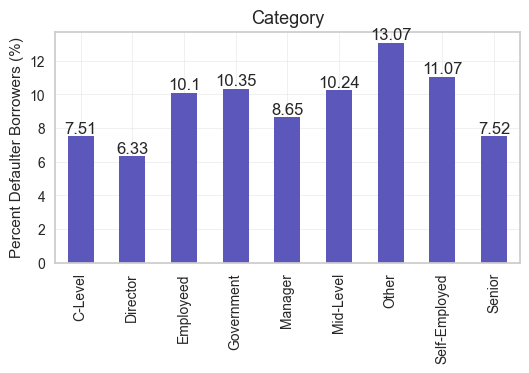

In [28]:
levels = default_percentage(df_eda, "category")
categorical_graph(levels)

##### **b. Numerical Feautres**: `loan_amnt`, `annual_inc`, `int_rate`, `dti`, `delinq_2yrs`, `pub_rec`, `total_acc`, `inq_last_6mths`, `open_acc`,`revol_util`, `revol_bal`, `tot_cur_bal`, `total_rev_hi_lim`.

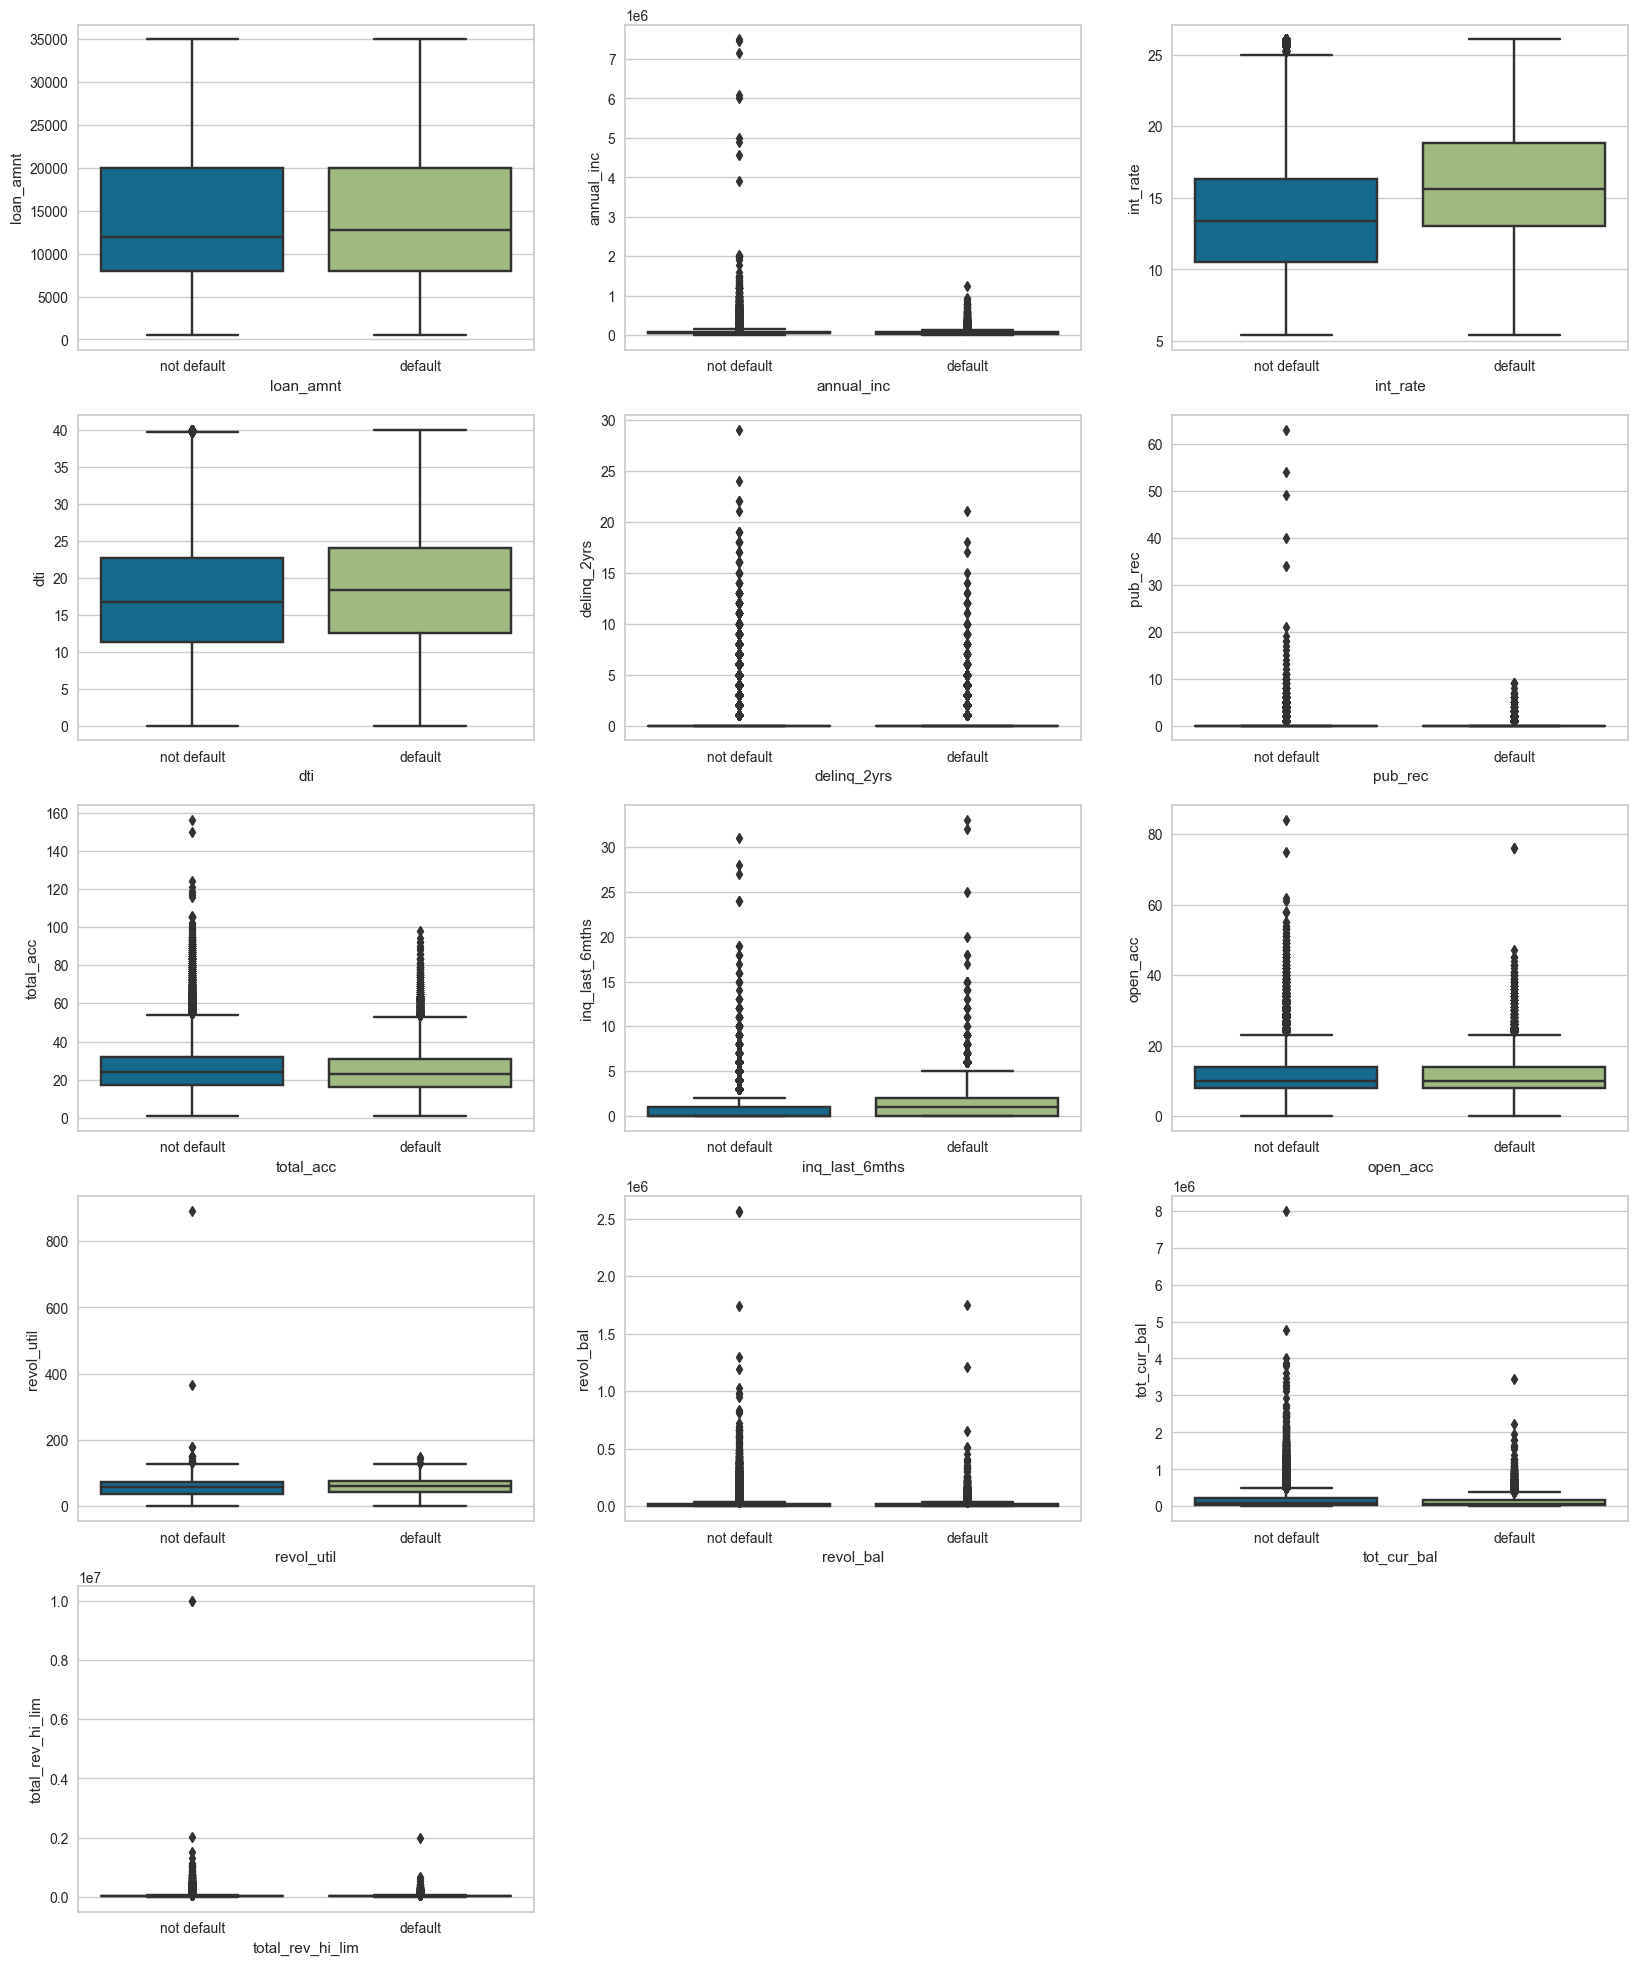

In [29]:
num_cols = ["loan_amnt", "annual_inc", "int_rate", "dti", "delinq_2yrs", 
            "pub_rec", "total_acc", "inq_last_6mths", "open_acc", "revol_util", 
            "revol_bal", "tot_cur_bal", "total_rev_hi_lim"]
# boxplot to show distribution deposit among numerical columns
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for feature in df_eda[num_cols].columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="loan_status", y= df_eda[feature], data=df_eda)
    plt.xlabel(feature)
    plotnumber+=1

plt.show()

c:\Users\madii\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\madii\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\madii\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

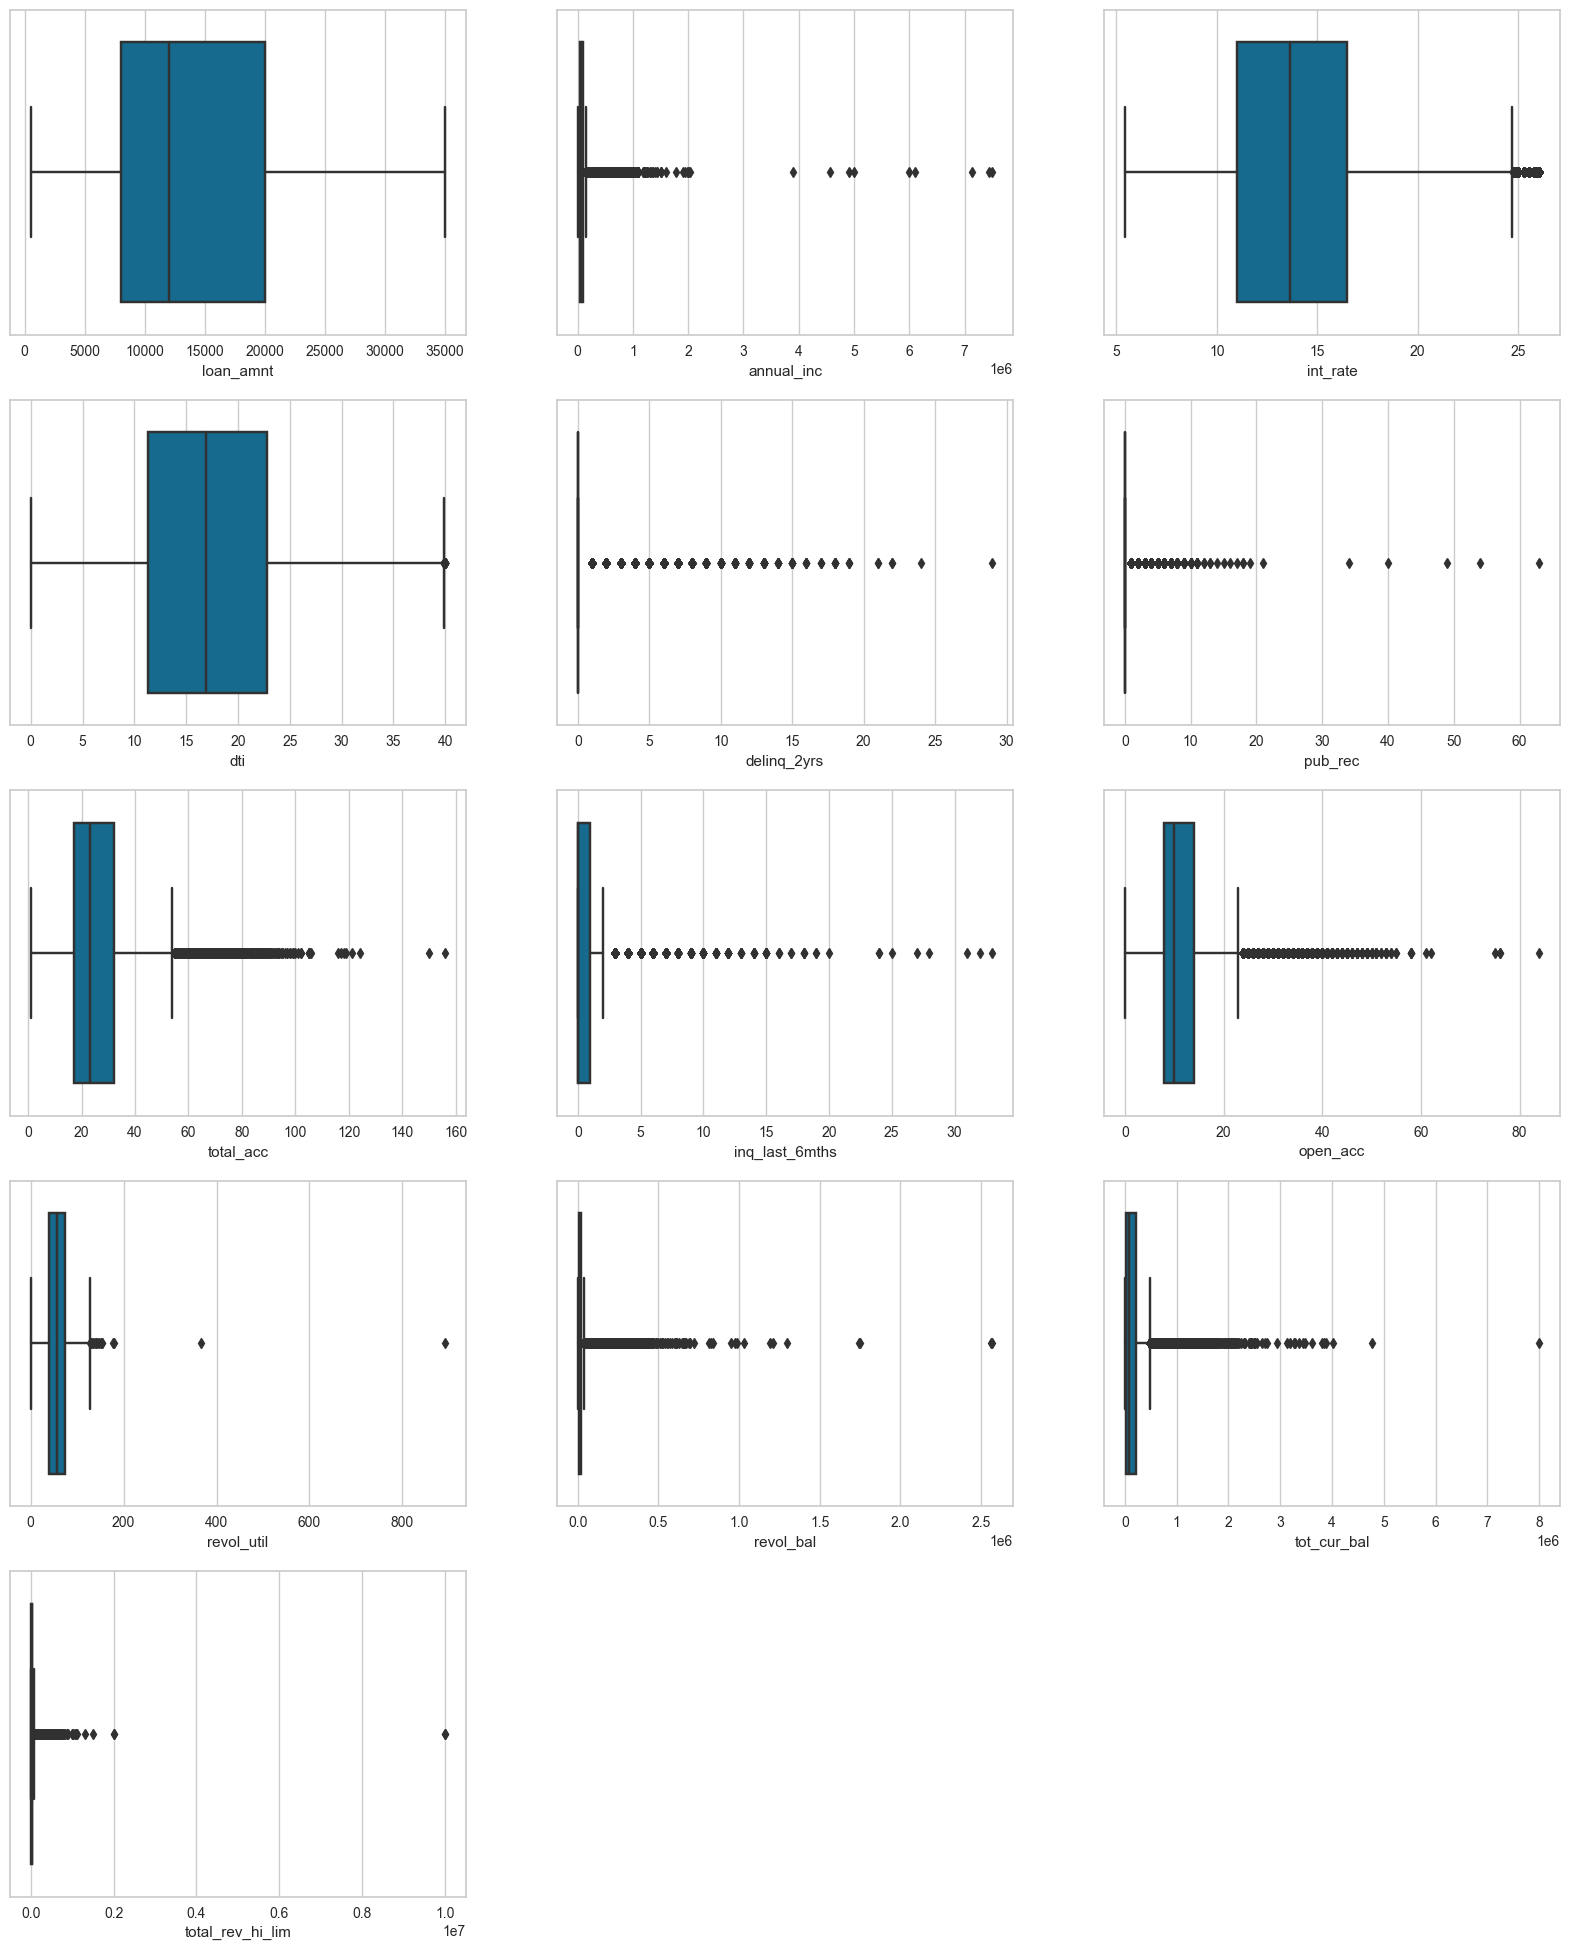

In [30]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df_eda[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

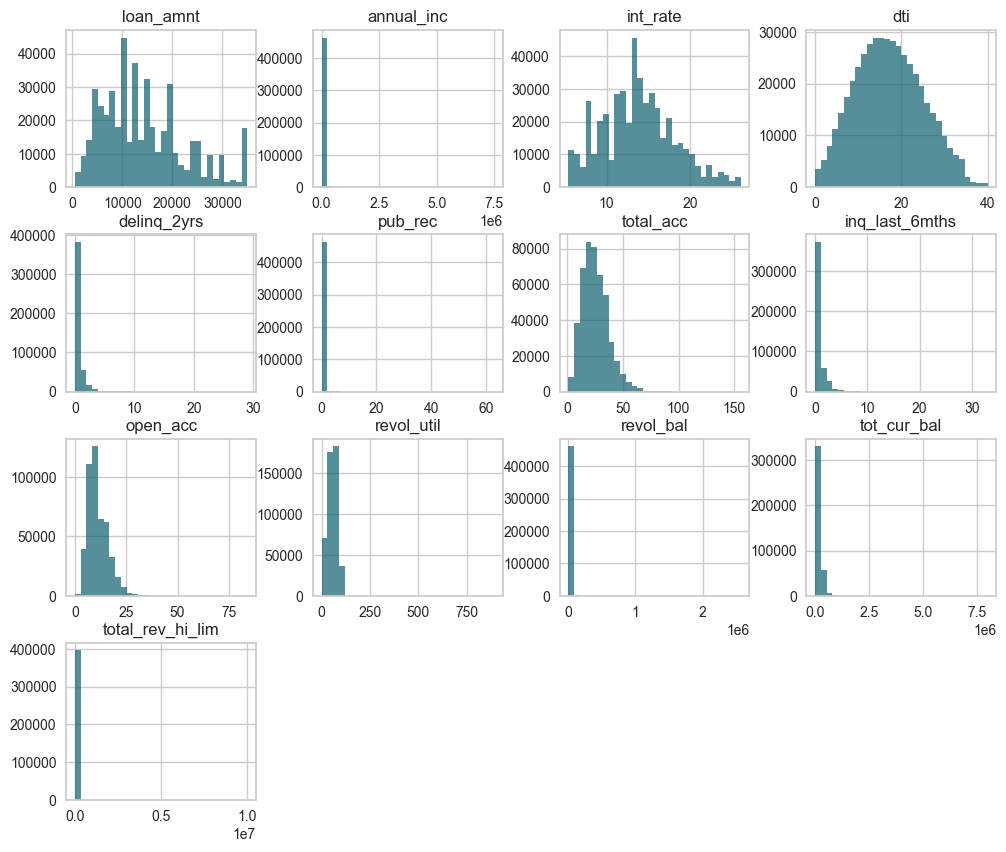

In [31]:
df_eda[num_cols].hist(figsize=(12,10), bins=30, color=colorpallete[1], alpha=0.7)
plt.show()

#### **Summary EDA** <br>
1. Borrowers with a loan `term` of 36 months, fewer defaulters.
2. `Grade` A is the lowest risk borrowers (not defaulters). in range A - G, risk defaulters increase.
3. `Sub-Grade` the same things as `Grade`.
4. How long employee (`emp_length`) have been employed doesn't show a significant difference in defaulters. However, employee with 10+ years work have less risk defaulters and employee with less than a year, have higher risk defaulters.
5. `Job levels` with less risk defaulters are : Director, Senior, C-Level, Manager. Meanwhile, Job levels with higher risk defaulters are Employeed, Government, Mid-Level, Self-Employed.
6. `Home ownership` with less risk defaulters are own, mortgage. meanwhile, none home ownership have higher risk of defaulters.
7. `Purpose` loan with less risk defaulters are: car, credit card, major, purchase. 



<a id='prepare-data-ml'></a>
### **3. Prepare the Data for Machine Learning Model**

In [32]:
# copy data for machine learning model
data = df.copy()

In [33]:
# recategorize the data
ls_categorize = {
    "Current":"not default", 
    "Fully Paid":"not default", 
    "Charged Off":"default", 
    "Late (31-120 days)":"default",
    "In Grace Period":"not default", 
    "Does not meet the credit policy. Status:Fully Paid":"not default",
    "Late (16-30 days)":"default", 
    "Default":"default",
    "Does not meet the credit policy. Status:Charged Off":"default"
}

# map the dict to the column 
data["loan_status"] = data["loan_status"].map(ls_categorize)
data.loan_status.value_counts()

not default    414099
default         52186
Name: loan_status, dtype: int64

#### **3.1. Delete Unnecessary, Data Leakage, and Columns with missing value more than 40%**

In [34]:
# drop columns with missing value more than 40%
for col in data.columns:
    if data[col].isna().mean() > 0.4:
        data.drop(col, axis=1, inplace=True)

In [35]:
# drop columns based on the assumptions, 
# the model i build is able to predict absolutely new customers from around the world

# delete unnecessary and data leakage
data.drop(columns=[
    # don't need this
    "Unnamed: 0", 
    "id", 
    "member_id",
    "url", 
    "zip_code",
    "addr_state", 

    # data leakage
    "issue_d", 
    "title", # already covered with purpose
    "earliest_cr_line", 
    "application_type", # one value
    "policy_code", # one value
    "last_pymnt_d", 
    "last_credit_pull_d",
    "pymnt_plan", # 99% one value
    "acc_now_delinq", 
    "tot_coll_amt",
    "funded_amnt_inv", 
    "out_prncp", 
    "out_prncp_inv",
    "total_pymnt", 
    "total_pymnt_inv", 
    "total_rec_prncp",
    "total_rec_int", 
    "total_rec_late_fee", 
    "recoveries",
    "collection_recovery_fee", 
    "funded_amnt", 
    "sub_grade",
    "collections_12_mths_ex_med",
    "last_pymnt_amnt"], axis=1, inplace=True)

In [36]:
data.isna().sum().sort_values(ascending=False).head(20)

total_rev_hi_lim       70276
tot_cur_bal            70276
emp_title              27588
emp_length             21008
revol_util               340
delinq_2yrs               29
total_acc                 29
pub_rec                   29
open_acc                  29
inq_last_6mths            29
annual_inc                 4
initial_list_status        0
revol_bal                  0
loan_amnt                  0
dti                        0
term                       0
loan_status                0
verification_status        0
home_ownership             0
grade                      0
dtype: int64

**a. Home ownership**

In [37]:
# lowering str value
data.home_ownership = data.home_ownership.apply(lambda x: x.lower())
# drop any
data.home_ownership = data.home_ownership[data.home_ownership != "any"]
# mapping none to other
data.home_ownership = data.home_ownership.replace("none", "other")

**b. Grade and Sub grade**

In [38]:
print("Missing Value Grade\t:", data.grade.isna().sum())
print("Grade\t:", data.grade.unique())

Missing Value Grade	: 0
Grade	: ['B' 'C' 'A' 'E' 'F' 'D' 'G']


**c. Employement Length**

In [39]:
# total missing value
print("Old Missing Value\t:", data.emp_length.isna().sum())

# missing value when loan status is default and fill with mode
data.loc[(data.emp_length.isna() == True) & (data.loan_status == "default"), "emp_length"] = \
    data[["emp_length", "loan_status"]].loc[(data.emp_length.isna() == True) & (data.loan_status == "default"), "emp_length"]\
        .fillna(data.emp_length.mode().iloc[0])

# drop missing value with loan status is not default
data.dropna(subset=["emp_length"], inplace=True)

# new missing value
print("New Missing Value\t:", data.emp_length.isna().sum())

Old Missing Value	: 21008
New Missing Value	: 0


**d. Employement Title**

In [40]:
# fill na in loan status default 
data.loc[(data.emp_title.isna()) & (data.loan_status == "default")]

# missing value when loan status is default and fill with mode
data.loc[(data.emp_title.isna() == True) & (data.loan_status == "default"), "emp_title"] = \
    data[["emp_title", "loan_status"]].loc[(data.emp_title.isna() == True) & (data.loan_status == "default"), "emp_title"]\
        .fillna(data.emp_title.mode().iloc[0])

# drop missing value with loan status is not default
data.dropna(subset=["emp_title"], inplace=True)

In [41]:
# preprocess the data
data["processed"] = data["emp_title"].astype(str)
# preprocess the data
data["processed"] = [re.sub(r"[^\w\s]", "", category) for category in data["processed"]] # remove punctuation
data["processed"] = [category.lower() for category in data["processed"]] # convert to lowercase

# identify the most frequent words
tokens = [token for category in data["processed"] for token in category.split()]
word_counts = Counter(tokens)
most_common_words = [word for word, count in word_counts.most_common(20)]

# job levels
levels = {
    "Mid-Level": ["mid", "intermediate", "supervisor"],
    "Senior": ["senior", "sr", "lead", "head"],
    "Manager": ["manager", "mr", "gm"],
    "Director": ["director"],
    "C-Level": ["ceo", "cfo", "cto", "chief", "president", "executive", "vice president", "vp", "cofounder"],
    "Self-Employed":["driver", "owner", "consultant", "paralegal", "va"],
    "Employeed": ["entry", "associate", "junior", 
                  "software", "programmer", "developer", "data", "information", "technology", "it specialist", "operations", "tech",
                  "nurse", "doctor", "medical", "health", "rn", "paramedic", "pharmacist",
                  "teacher", "professor", "education", "physician",
                  "accountant", "finance", "bank", "analyst",
                  "sales", "marketing", "advertising", "service",
                  "engineer", "mechanic", "construction", "technician", "controller", "electrician", "installer", 
                  "technical", "server", "machine",
                  "admin", "assistant", "clerk", "secretary",
                  "chef", "researcher", "security", "cashier", "photography", "quality", "pilot"
                  ],
    "Government":["army", "police", "officer", "deputy", "principal", "defense", "lpn", 
                  "usaf", "usps"]
}

# Assign categories to job categories
def assign_category(processed):
    # for category, words in categories.items():
    #     for word in words:
    #         if word in processed:
    #             return category
    
    for level, words in levels.items():
        for word in words:
            if word in processed:
                return level
    
    return "Other"

data["category"] = data["processed"].apply(assign_category)

**e. Purpose**

In [42]:
# correcting the format
data["purpose"] = [re.sub(r"[^\w\s]|_", " ", category) for category in data["purpose"]]

**f. delinq 2 years** : total late payment within 2 years 

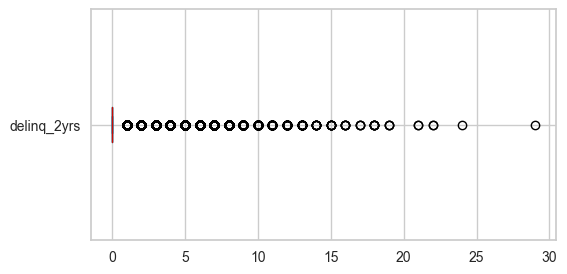

In [43]:
plt.figure(figsize=(6, 3))
data.delinq_2yrs.plot(kind="box",vert=False)
plt.show()

**note:**<br>
from above output, i'll just change the value become yes or no to avoid outlier. (next section) 

In [44]:
# fill missing value with median if loan status is default, else drop.
data.loc[(data.delinq_2yrs.isna() == True) & (data.loan_status == "default"), "delinq_2yrs"] = \
    data[["delinq_2yrs", "loan_status"]].loc[(data.delinq_2yrs.isna() == True) & (data.loan_status == "default"), "delinq_2yrs"]\
        .fillna(data.delinq_2yrs.median())

# drop missing value if loan status is not default
data.dropna(subset=["delinq_2yrs"], inplace=True)

**g. pub rec** : Total of public records of failed payment

In [45]:
# fill missing value with median if loan status is default, else drop.
data.loc[(data.pub_rec.isna() == True) & (data.loan_status == "default"), "pub_rec"] = \
    data[["pub_rec", "loan_status"]].loc[(data.pub_rec.isna() == True) & (data.loan_status == "default"), "pub_rec"]\
        .fillna(data.pub_rec.median())

**h. total acc**

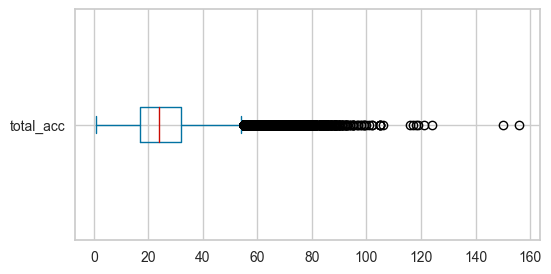

In [46]:
plt.figure(figsize=(6, 3))
data.total_acc.plot(kind="box", vert=False)
plt.show()

In [47]:
data.loc[(data.total_acc.isna() == True) & (data.loan_status == "default"), "total_acc"] = \
    data[["total_acc", "loan_status"]].loc[(data.total_acc.isna() == True) & (data.loan_status == "default"), "total_acc"]\
        .fillna(data.total_acc.median())

**i. inq ast 6mnths**

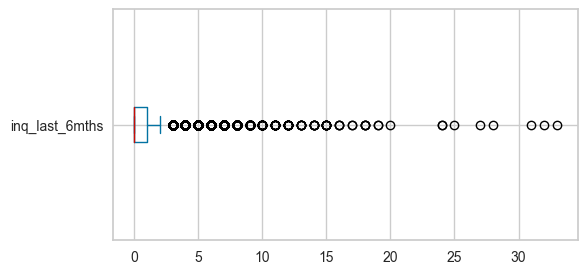

In [48]:
plt.figure(figsize=(6,3))
data.inq_last_6mths.plot(kind='box', vert=False)
plt.show()

In [49]:
data.loc[(data.inq_last_6mths.isna() == True) & (data.loan_status == "default"), "inq_last_6mths"] = \
    data[["inq_last_6mths", "loan_status"]].loc[(data.inq_last_6mths.isna() == True) & (data.loan_status == "default"), "inq_last_6mths"]\
        .fillna(data.inq_last_6mths.median())

**j. revol util**

In [50]:
# plt.figure(figsize=(6,3))
# data.revol_util.plot(kind='box', vert=False)
# plt.show()

In [51]:
# fill missing value with median if loan status is default, else drop.
data.loc[(data.revol_util.isna() == True) & (data.loan_status == "default"), "revol_util"] = \
    data[["revol_util", "loan_status"]].loc[(data.revol_util.isna() == True) & (data.loan_status == "default"), "revol_util"]\
        .fillna(data.revol_util.median())

# drop missing value if loan status is not default
data.dropna(subset=["revol_util"], inplace=True)

**k. tot_cur_ball** : Total saldo saat ini dari semua akun tercatat.

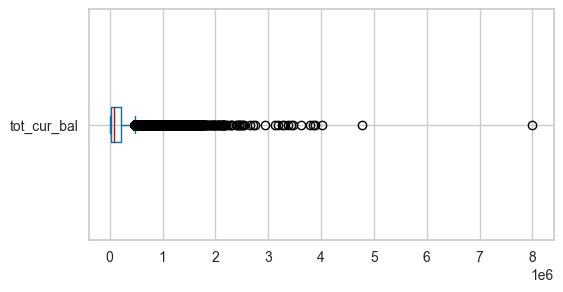

In [52]:
plt.figure(figsize=(6,3))
data.tot_cur_bal.plot(kind='box', vert=False)
plt.show()

In [53]:
# fill missing value with median if loan status is default, else drop.
data.loc[(data.tot_cur_bal.isna() == True) & (data.loan_status == "default"), "tot_cur_bal"] = \
    data[["tot_cur_bal", "loan_status"]].loc[(data.tot_cur_bal.isna() == True) & (data.loan_status == "default"), "tot_cur_bal"]\
        .fillna(data.tot_cur_bal.median())

# drop missing value if loan status is not default
data.dropna(subset=["tot_cur_bal"], inplace=True)

**l. total_rev_hi_lim**

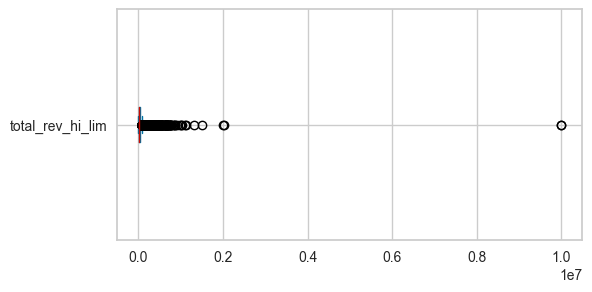

In [54]:
plt.figure(figsize=(6,3))
data.total_rev_hi_lim.plot(kind='box', vert=False)
plt.show()

In [55]:
# fill missing value with median if loan status is default, else drop.
data.loc[(data.total_rev_hi_lim.isna() == True) & (data.loan_status == "default"), "total_rev_hi_lim"] = \
    data[["total_rev_hi_lim", "loan_status"]].loc[(data.total_rev_hi_lim.isna() == True) & (data.loan_status == "default"), "total_rev_hi_lim"]\
        .fillna(data.total_rev_hi_lim.median())

# drop missing value if loan status is not default
data.dropna(subset=["total_rev_hi_lim"], inplace=True)

In [56]:
data.dropna(inplace=True)

In [57]:
data.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,tot_cur_bal,total_rev_hi_lim,processed,category
1,2500,60 months,15.27,59.83,C,Ryder,< 1 year,rent,30000.00,Source Verified,default,car,1.00,0.00,5.00,3.00,0.00,1687,9.40,4.00,f,84076.00,23000.00,ryder,Other
8,5600,60 months,21.28,152.39,F,Teacher,4 years,own,40000.00,Source Verified,default,small business,5.55,0.00,2.00,11.00,0.00,5210,32.60,13.00,f,84076.00,23000.00,teacher,Employeed
9,5375,60 months,12.69,121.45,B,Starbucks,< 1 year,rent,15000.00,Verified,default,other,18.08,0.00,0.00,2.00,0.00,9279,36.50,3.00,f,84076.00,23000.00,starbucks,Other
12,9000,36 months,13.49,305.38,C,Va. Dept of Conservation/Recreation,< 1 year,rent,30000.00,Source Verified,default,debt consolidation,10.08,0.00,1.00,4.00,0.00,10452,91.70,9.00,f,84076.00,23000.00,va dept of conservationrecreation,Self-Employed
14,10000,36 months,10.65,325.74,B,SFMTA,3 years,rent,100000.00,Source Verified,default,other,7.06,0.00,2.00,14.00,0.00,11997,55.50,29.00,f,84076.00,23000.00,sfmta,Other


<a id='base-model'></a>
### **4. Build Model**

#### **4.1 Feature Engineering**

In [58]:
data.verification_status = data.verification_status.replace(["Verified", "Not Verified", "Source Verified"], [2, 0, 1])

In [59]:
data.term = data.term.replace([" 36 months", " 60 months"], [0, 1])

In [60]:
# transform and encoding 
data.inq_last_6mths = data.inq_last_6mths.apply(lambda x: "yes" if x > 0 else "no")
data.delinq_2yrs = data.delinq_2yrs.apply(lambda x: "late" if x>0 else "not late")
data.pub_rec = data.pub_rec.apply(lambda x: "good" if x==0 else "bad")
data.delinq_2yrs = data.delinq_2yrs.replace(["not late", "late"], [0,1])
data.inq_last_6mths = data.inq_last_6mths.replace(["no", "yes"], [0, 1])
data.pub_rec = data.pub_rec.replace(["bad", "good"], [0, 1])  
data.initial_list_status = data.initial_list_status.replace(['f', 'w'], [0, 1])

#### **4.2. Create Data Test**

In [61]:
# create test set
X = data.drop(columns=["loan_status", "emp_title", "processed", "initial_list_status"], axis=1)
y = data["loan_status"].replace(["not default", "default"], [0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.2)

In [62]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, ["purpose", "emp_length", "grade", "home_ownership", "category"])
], remainder="passthrough")

#### **4.3. Modelling**

In [63]:
xgboost = Pipeline([
    ("preprocess", preprocessor),
    ("xg_model", xgb.XGBClassifier(random_state=42))
]) 
xgboost.fit(X_train, y_train)


ypred_xg = xgboost.predict(X_test)
print(classification_report(y_test, ypred_xg))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     66853
           1       0.95      0.22      0.36     10437

    accuracy                           0.89     77290
   macro avg       0.92      0.61      0.65     77290
weighted avg       0.90      0.89      0.86     77290



In [64]:
LGBM_imbalance = Pipeline([
    ("preprocess", preprocessor),
    ("LGBM_model", lgb.LGBMClassifier(random_state=42))
]) 
LGBM_imbalance.fit(X_train, y_train)


ypred_lgb = LGBM_imbalance.predict(X_test)
print(classification_report(y_test, ypred_lgb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     66853
           1       0.98      0.22      0.36     10437

    accuracy                           0.89     77290
   macro avg       0.93      0.61      0.65     77290
weighted avg       0.90      0.89      0.86     77290



### **4.3. Handling Imbalanced**

In [65]:
ROS = RandomOverSampler(sampling_strategy="minority", random_state=42)

X_train_ros, y_train_ros = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ros)

array([267410, 267410], dtype=int64)

In [66]:
LGBM_balance = Pipeline([
    ("preprocess", preprocessor),
    ("LGBM_balance_model", lgb.LGBMClassifier(random_state=42))
]) 
LGBM_balance.fit(X_train_ros, y_train_ros)


ypred_lgb = LGBM_balance.predict(X_test)
print(classification_report(y_test, ypred_lgb))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     66853
           1       0.27      0.64      0.38     10437

    accuracy                           0.72     77290
   macro avg       0.60      0.69      0.60     77290
weighted avg       0.84      0.72      0.76     77290



#### **4.4. Tuning**

In [67]:
# define parameter space for randomized search
param_dist = {
    'LGBM_tune__num_leaves': [20, 30, 40, 50, 60],
    'LGBM_tune__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'LGBM_tune__max_depth': [-1, 5, 10, 15, 20],
    'LGBM_tune__min_child_samples': [10, 20, 30, 40, 50],
    'LGBM_tune__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'LGBM_tune__colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'LGBM_tune__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'LGBM_tune__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'LGBM_tune__n_estimators': [100, 200, 300, 400, 500],
    'LGBM_tune__random_state': [42]
}


LGBM_tune = Pipeline([
    ("preprocess", preprocessor),
    ("LGBM_tune", lgb.LGBMClassifier(random_state=42))
]) 
LGBM_tune.fit(X_train_ros, y_train_ros)


# define randomized search
random_search = RandomizedSearchCV(
    estimator=LGBM_tune,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# fit randomized search to training data
random_search.fit(X_train_ros, y_train_ros)

# print best parameters and score
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters:  {'LGBM_tune__subsample': 0.8, 'LGBM_tune__reg_lambda': 0.5, 'LGBM_tune__reg_alpha': 0.1, 'LGBM_tune__random_state': 42, 'LGBM_tune__num_leaves': 60, 'LGBM_tune__n_estimators': 500, 'LGBM_tune__min_child_samples': 30, 'LGBM_tune__max_depth': 10, 'LGBM_tune__learning_rate': 0.3, 'LGBM_tune__colsample_bytree': 0.8}
Best score:  0.8512116281282914


In [68]:
# parameter from tuning
LGBM_balance = Pipeline([
    ("preprocess", preprocessor),
    ("LGBM_balance_model", lgb.LGBMClassifier(random_state=42,
                                              subsample=1,
                                              reg_lambda=1,
                                              reg_alpha=1,
                                              num_leaves=60,
                                              n_estimators=500,
                                              min_child_samples=30,
                                              max_depth=20,
                                              learning_rate=0.1,
                                              colsample_bytree=0.9))
]) 
LGBM_balance.fit(X_train_ros, y_train_ros)


ypred_lgb = LGBM_balance.predict(X_test)
print(classification_report(y_test, ypred_lgb))

              precision    recall  f1-score   support

           0       0.92      0.80      0.85     66853
           1       0.30      0.57      0.39     10437

    accuracy                           0.77     77290
   macro avg       0.61      0.68      0.62     77290
weighted avg       0.84      0.77      0.79     77290



In [69]:
# set best parameters for LGBM_tune pipeline
best_params = random_search.best_params_
LGBM_tune.set_params(**best_params)

# fit LGBM_tune pipeline with best parameters on training data
LGBM_tune.fit(X_train_ros, y_train_ros)

# predict on test data
y_pred = LGBM_tune.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     66853
           1       0.32      0.48      0.39     10437

    accuracy                           0.79     77290
   macro avg       0.62      0.66      0.63     77290
weighted avg       0.83      0.79      0.81     77290



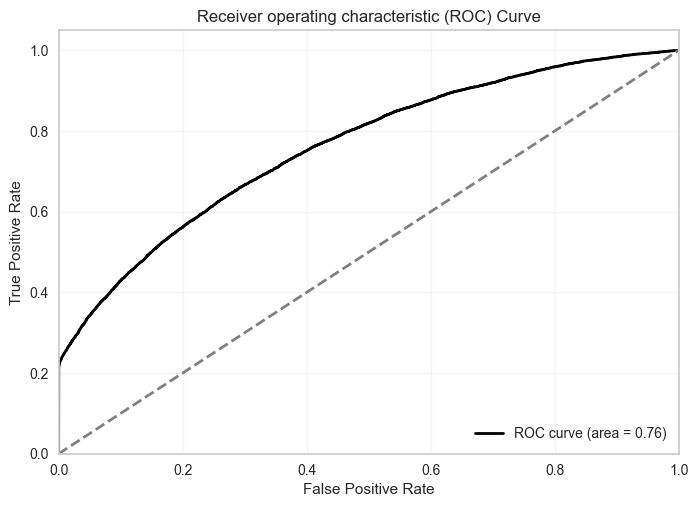

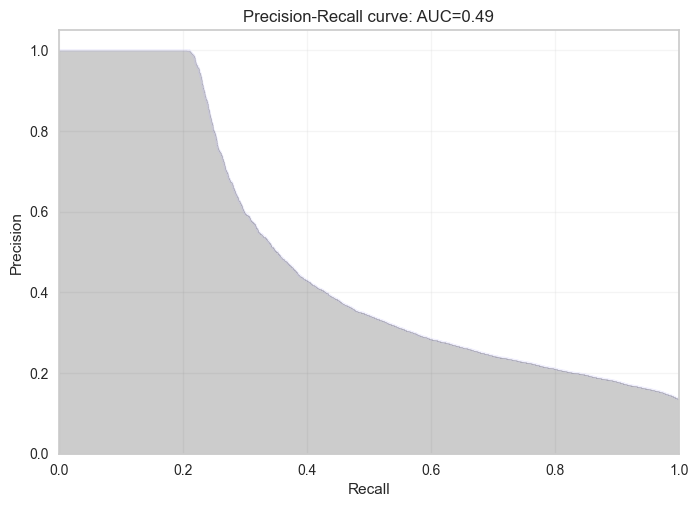

In [70]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = LGBM_balance.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='#BBB7F8', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(alpha=0.2)
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()

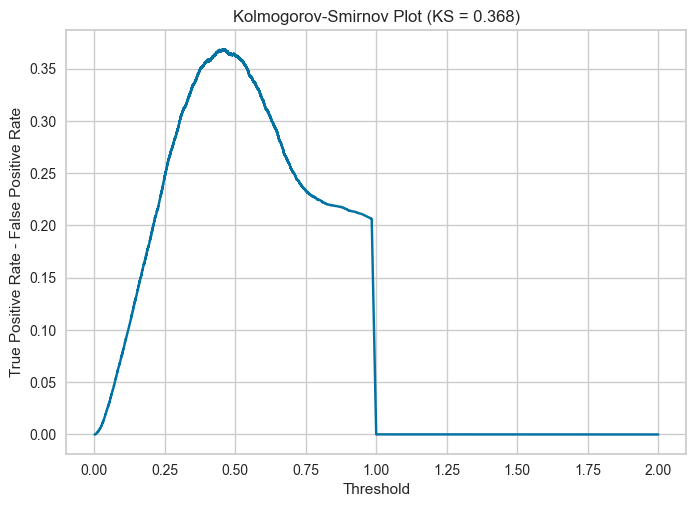

In [71]:
from sklearn import metrics
y_pred = LGBM_balance.predict(X_test)
y_prob = LGBM_balance.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)
ks = np.max(tpr-fpr)
plt.plot(thresholds, tpr-fpr)
plt.title('Kolmogorov-Smirnov Plot (KS = {:.3f})'.format(ks))
plt.xlabel('Threshold')
plt.ylabel('True Positive Rate - False Positive Rate')
plt.show()


#### **4.5. Feature Importance**

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate feature importances
result = permutation_importance(LGBM_balance, X_train_ros, y_train_ros, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train_ros.shape[1]):
    print(f"{f+1}. {X_train_ros.columns[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_ros.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_ros.shape[1]), X_train_ros.columns[indices], rotation=90)
plt.xlim([-1, X_train_ros.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
X_train_ros = X_train_ros.drop(columns=["delinq_2yrs"])
X_test = X_test.drop(columns=["delinq_2yrs"])

In [ ]:
# parameter from tuning
LGBM_balance = Pipeline([
    ("preprocess", preprocessor),
    ("LGBM_balance_model", lgb.LGBMClassifier(random_state=42,
                                              subsample=1,
                                              reg_lambda=1,
                                              reg_alpha=1,
                                              num_leaves=60,
                                              n_estimators=100,
                                              min_child_samples=30,
                                              max_depth=20,
                                              learning_rate=0.05,
                                              colsample_bytree=0.9))
]) 
LGBM_balance.fit(X_train_ros, y_train_ros)


ypred_lgb = LGBM_balance.predict(X_test)
print(classification_report(y_test, ypred_lgb))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     66853
           1       0.27      0.64      0.38     10437

    accuracy                           0.72     77290
   macro avg       0.60      0.69      0.60     77290
weighted avg       0.84      0.72      0.76     77290



In [ ]:
# X_train_ros.drop(columns=["revol_util"], inplace=True)
# X_test.drop(columns=["revol_util"], inplace=True)

KeyError: "['revol_util'] not found in axis"

In [ ]:
# X_train_ros.drop(columns=["open_acc", "total_acc"], inplace=True)
# X_test.drop(columns=["open_acc", "total_acc"], inplace=True)

In [ ]:
LGBM_tune.fit(X_train_ros, y_train_ros)

# predict on test data
y_pred = LGBM_tune.predict(X_test)

# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86     66853
           1       0.30      0.54      0.39     10437

    accuracy                           0.77     77290
   macro avg       0.61      0.67      0.62     77290
weighted avg       0.84      0.77      0.79     77290



<a id='final-model'></a>
### **5. Final Model** - LGBM 

**Handling Imbalanced Dataset with Undersampling Techniques**

**Tuning**

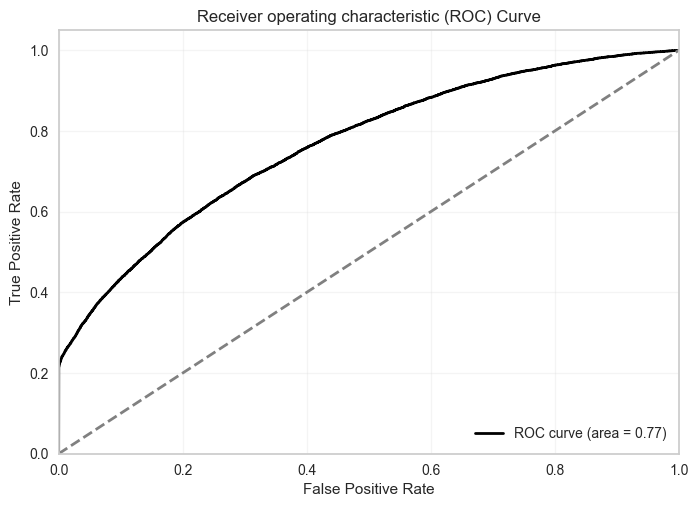

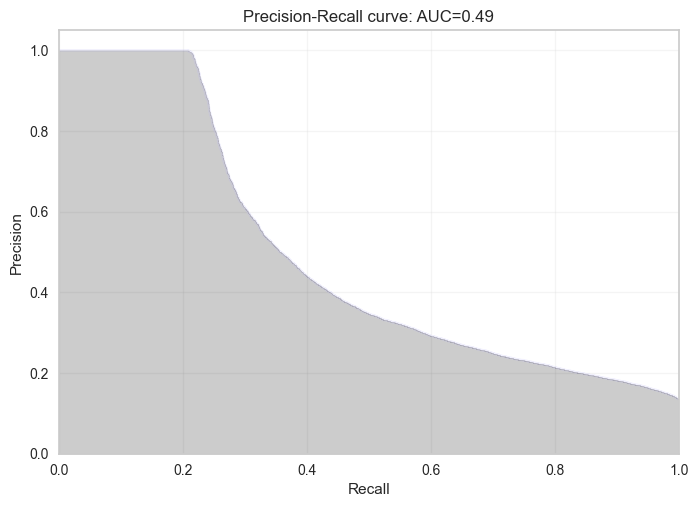

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = LGBM_balance.predict_proba(X_test)[:,1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(alpha=0.2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.step(recall, precision, color='#BBB7F8', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='black')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(alpha=0.2)
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()

In [ ]:
def eval_test (X,y,model) :
    prediction = model.predict(X)
    
    cm = confusion_matrix(y,prediction,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels=model.classes_)
    
    print(f' Recall Score : {recall_score(y,prediction)}')
    print(f' Precision Score : {precision_score(y,prediction)}')
    print(f' F1 Score : {f1_score(y,prediction)}')
    print(f' ROC-AUC Score : {roc_auc_score(y,model.predict_proba(X)[:,1])}')
    
    disp.plot()

 Recall Score : 0.2214237807799176
 Precision Score : 0.9746942218473218
 F1 Score : 0.36086820737039355
 ROC-AUC Score : 0.7677021497550163


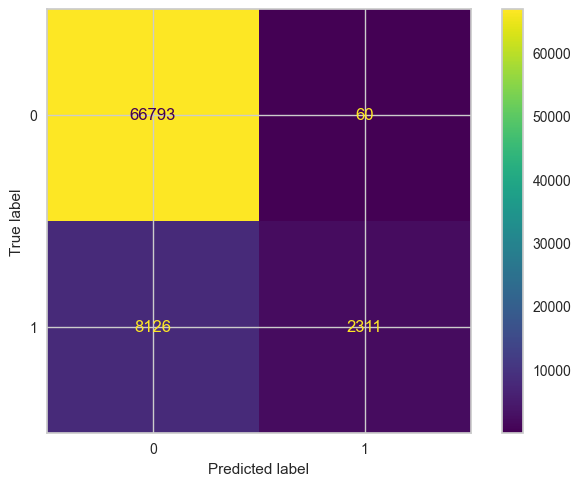

In [ ]:
eval_test(Xn_test, yn_test, final_lgb)